In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:\\Users\\Mubasshira\\Downloads\\tsa_claims.csv')
df.head(6)

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,2-Feb-02,1/16/2004 0:00,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2005032379513,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full
5,2005032479636,18-Feb-02,2/17/2005 0:00,CAK,Akron-Canton Regional,Air Tran Airlines(do not use),Passenger Property Loss,Checked Baggage,Other,$459.01,Settled,$227.00,Settle


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204267 entries, 0 to 204266
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Claim Number   204267 non-null  object
 1   Date Received  204004 non-null  object
 2   Incident Date  202084 non-null  object
 3   Airport Code   195743 non-null  object
 4   Airport Name   195743 non-null  object
 5   Airline Name   169893 non-null  object
 6   Claim Type     196354 non-null  object
 7   Claim Site     203527 non-null  object
 8   Item           200301 non-null  object
 9   Claim Amount   200224 non-null  object
 10  Status         204262 non-null  object
 11  Close Amount   135315 non-null  object
 12  Disposition    131359 non-null  object
dtypes: object(13)
memory usage: 20.3+ MB


# Data Cleaning

In [4]:
df.drop(df[df['Claim Number'] == '==> 2.csv.new <=='].index, inplace=True)
df.drop(df[df['Claim Number'] == '==> 3.csv.new <=='].index, inplace=True)
df.drop(df[df['Claim Number'] == '==> 4.csv.new <=='].index, inplace=True)
df.reset_index(drop=True, inplace=True)

In [5]:
df.replace('-', np.nan, inplace=True)

In [6]:
df.dropna(subset=['Date Received', 'Incident Date','Airport Code','Airport Name', 'Airline Name', 'Claim Type',
                  'Claim Site', 'Item', 'Status','Disposition'], inplace=True)

In [7]:
df.fillna(0, inplace=True)

In [8]:
df.isnull().sum()

Claim Number     0
Date Received    0
Incident Date    0
Airport Code     0
Airport Name     0
Airline Name     0
Claim Type       0
Claim Site       0
Item             0
Claim Amount     0
Status           0
Close Amount     0
Disposition      0
dtype: int64

In [9]:
df.drop(columns=['Incident Date'], inplace=True)

In [10]:
import datetime

df['Date Received'] = pd.to_datetime(df['Date Received'])
df['Received month'] = df['Date Received'].dt.month
df['Received day'] = df['Date Received'].dt.weekday

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95750 entries, 0 to 145142
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Claim Number    95750 non-null  object        
 1   Date Received   95750 non-null  datetime64[ns]
 2   Airport Code    95750 non-null  object        
 3   Airport Name    95750 non-null  object        
 4   Airline Name    95750 non-null  object        
 5   Claim Type      95750 non-null  object        
 6   Claim Site      95750 non-null  object        
 7   Item            95750 non-null  object        
 8   Claim Amount    95750 non-null  object        
 9   Status          95750 non-null  object        
 10  Close Amount    95750 non-null  object        
 11  Disposition     95750 non-null  object        
 12  Received month  95750 non-null  int32         
 13  Received day    95750 non-null  int32         
dtypes: datetime64[ns](1), int32(2), object(11)
memory usage: 1

In [12]:
# Remove unwanted characters from 'Claim Amount'
df['Claim Amount'] = df['Claim Amount'].where(df['Claim Amount'].str.contains('$', na=False), df['Claim Amount'])
df['Claim Amount'] = df['Claim Amount'].str.replace('$', '', regex=False)
df['Claim Amount'] = df['Claim Amount'].str.replace(';', ',', regex=False)
df['Claim Amount'] = df['Claim Amount'].str.replace(',', '', regex=False)

# Remove unwanted characters from 'Close Amount'
df['Close Amount'] = df['Close Amount'].where(df['Close Amount'].str.contains('$', na=False), df['Close Amount'])
df['Close Amount'] = df['Close Amount'].str.replace('$', '', regex=False)
df['Close Amount'] = df['Close Amount'].str.replace(';', ',', regex=False)
df['Close Amount'] = df['Close Amount'].str.replace(',', '', regex=False)

In [13]:
df.fillna(0, inplace=True)

In [14]:
df['Status'] = df['Status'].str.replace('Approve in Full','Approved',regex=False).str.replace('Deny','Denied',regex=False).str.replace('Settled','Settle',regex=False).str.replace('Canceled','Cancelled',regex=False)

In [15]:
df.reset_index(drop=True, inplace=True)

In [16]:
df['Claim Amount'] = df['Claim Amount'].astype(float)
df['Close Amount'] = df['Close Amount'].astype(float)

In [17]:
df['Disposition'] = np.where(df['Close Amount'] == 0, 'Deny','Approve in Full')

In [18]:
df['Disposition'].value_counts()

Disposition
Deny               53659
Approve in Full    42091
Name: count, dtype: int64

# Data Viz

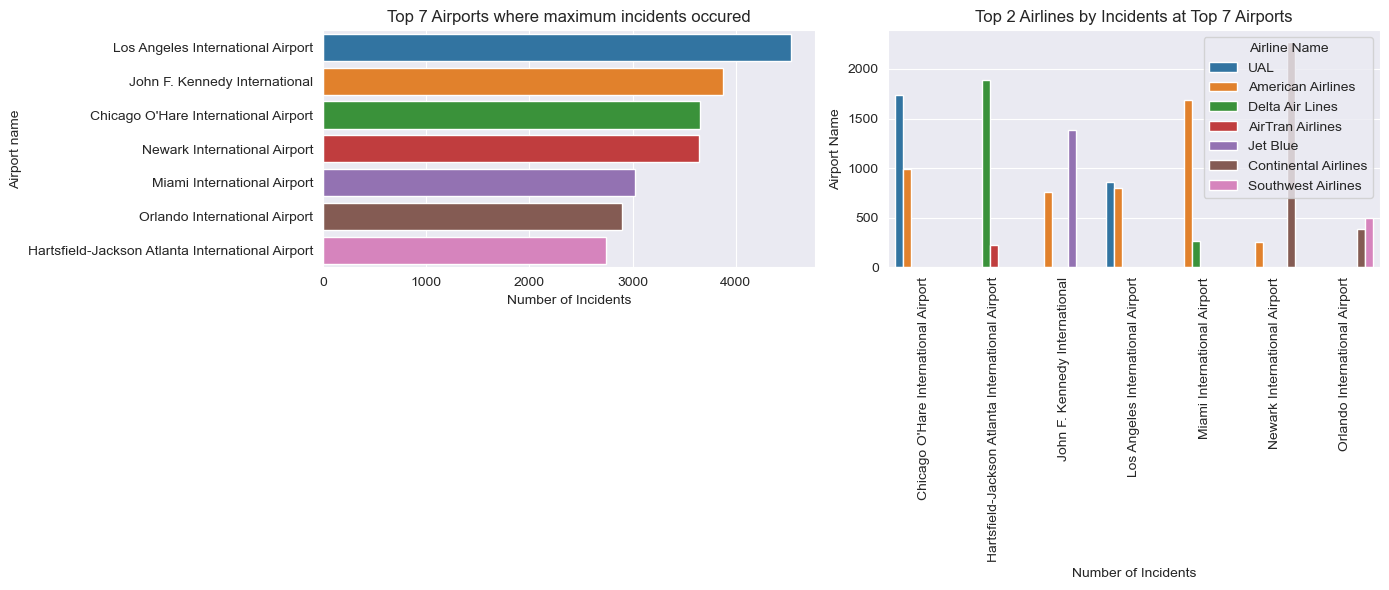

In [19]:
airportname_dist = df['Airport Name'].value_counts().sort_values(ascending=False).head(7)
top_airports = airportname_dist.index

filtered_df = df[df['Airport Name'].isin(top_airports)]
airportname_line_grouped = filtered_df.groupby(['Airport Name', 'Airline Name']).size().reset_index(name='Incidents')

top_airlines_per_airport = airportname_line_grouped.groupby('Airport Name').apply(lambda x: x.nlargest(2, 'Incidents')).reset_index(drop=True)
sns.set_style('darkgrid')

plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
sns.barplot(x=airportname_dist.values, y=airportname_dist.index, orient='horizontal')
plt.ylabel('Airport name')
plt.xlabel('Number of Incidents')
plt.title("Top 7 Airports where maximum incidents occured")

plt.subplot(1,2,2)
sns.barplot(data=top_airlines_per_airport, y='Incidents', x='Airport Name', hue='Airline Name')
plt.ylabel('Airport Name')
plt.xlabel('Number of Incidents')
plt.title("Top 2 Airlines by Incidents at Top 7 Airports")
plt.xticks(rotation=90)
# Show the plots
plt.tight_layout()
plt.show()

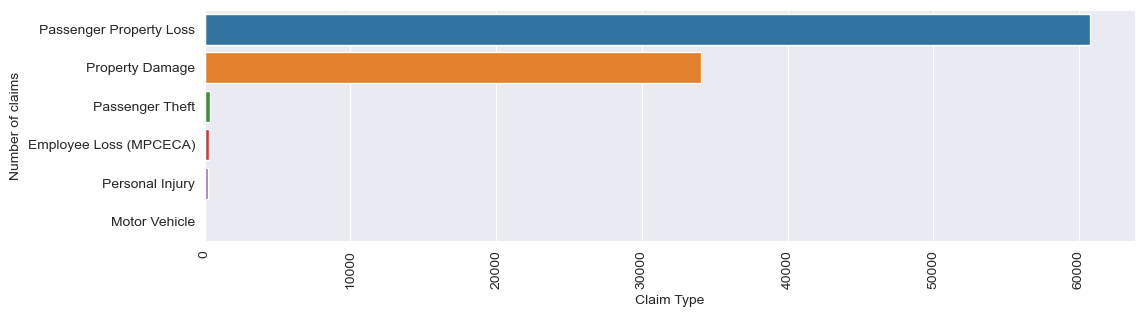

In [20]:
claimtype_count = df['Claim Type'].value_counts()
plt.figure(figsize=(12,3))
sns.barplot(x=claimtype_count.values, y=claimtype_count.index, orient='horizontal')
plt.xticks(rotation=90)
plt.xlabel('Claim Type')
plt.ylabel('Number of claims')
plt.show()

In [21]:
df.describe(include='all')

,Claim Number,Date Received,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Received month,Received day
count,95750,95750,95750,95750,95750,95750,95750,95750,9.575000e+04,95750,95750.000000,95750,95750.000000,95750.00000
unique,95750,NaN,411,411,187,6,4,3073,NaN,8,NaN,2,NaN,NaN
top,0909802M,NaN,LAX,Los Angeles International Airport,American Airlines,Passenger Property Loss,Checked Baggage,Other,NaN,Denied,NaN,Deny,NaN,NaN
freq,1,NaN,4537,4537,14092,60789,81289,18153,NaN,54033,NaN,53659,NaN,NaN
mean,NaN,2006-06-26 08:45:39.834987008,NaN,NaN,NaN,NaN,NaN,NaN,3.612381e+03,NaN,88.280401,NaN,6.450245,1.85694
min,NaN,1994-01-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,0.000000,NaN,1.000000,0.00000
25%,NaN,2004-12-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,6.500000e+01,NaN,0.000000,NaN,4.000000,1.00000
50%,NaN,2006-06-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.837950e+02,NaN,0.000000,NaN,6.000000,2.00000
75%,NaN,2007-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,4.829950e+02,NaN,60.000000,NaN,9.000000,3.00000
max,NaN,2055-05-17 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.250000e+08,NaN,250000.000000,NaN,12.000000,6.00000


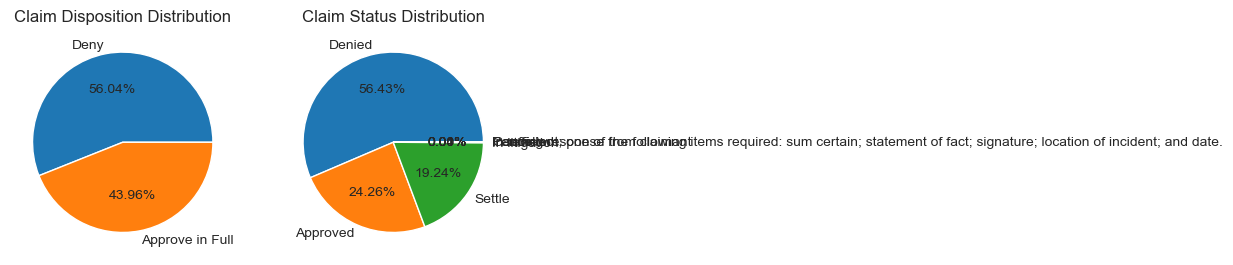

In [22]:
disposition_dist = df['Disposition'].value_counts()

plt.subplot(1,2,1)
#plt.figure(figsize=(4,4))
plt.pie(disposition_dist, autopct='%.2f%%', labels=disposition_dist.index)
plt.title("Claim Disposition Distribution")

status_dist = df['Status'].value_counts()
#explode = [.1, .2, .1, 0, 0, 0, 0, 0]
plt.subplot(1,2,2)
#plt.figure(figsize=(4,4))
plt.pie(status_dist, autopct='%.2f%%', labels=status_dist.index)
plt.title("Claim Status Distribution")

plt.tight_layout()
plt.show()

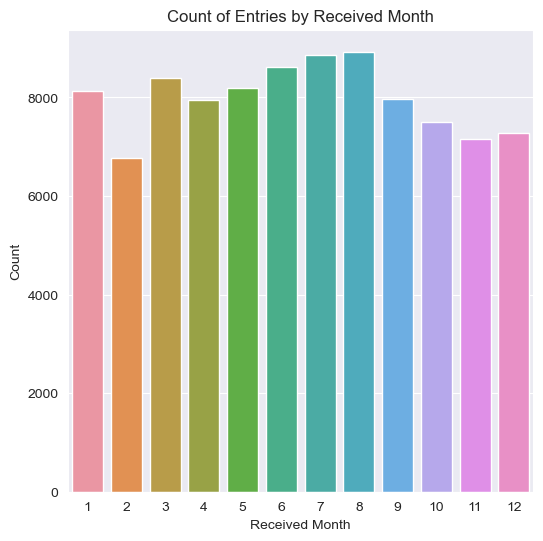

In [23]:
month_counts = df['Received month'].value_counts().sort_index()
plt.figure(figsize=(6, 6))
sns.barplot(x=month_counts.index, y=month_counts.values)
plt.xlabel('Received Month')
plt.ylabel('Count')
plt.title('Count of Entries by Received Month')
plt.show()

Maximum Incidents happened in August

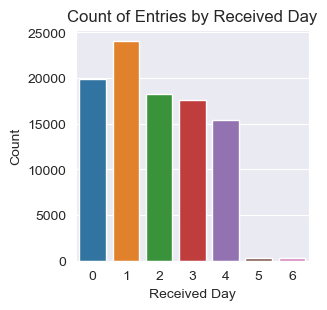

In [24]:
day_counts = df['Received day'].value_counts().sort_index()
plt.figure(figsize=(3,3))
sns.barplot(x=day_counts.index, y=day_counts.values)
plt.xlabel('Received Day')
plt.ylabel('Count')
plt.title('Count of Entries by Received Day')
plt.show()

In [25]:
df.drop(columns=['Claim Number', 'Date Received', 'Airport Name'], inplace=True)

# Let's create a Claim approval prediction Model

In [26]:
X = df.drop(columns=['Disposition', 'Status'])
y = df['Disposition']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
#cat_columns = df.select_dtypes('O').columns
num_columns = ['Claim Amount', 'Close Amount']

In [28]:
X_train

,Airport Code,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Close Amount,Received month,Received day
68139,JFK,Lufthansa,Passenger Property Loss,Checked Baggage,Locks,28.32,0.00,10,2
60541,MCO,Jet Blue,Passenger Property Loss,Checkpoint,Cameras - Digital,415.00,0.00,4,1
13388,RSW,USAir,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,250.00,250.00,5,1
3150,LAX,American Airlines,Property Damage,Checked Baggage,Luggage (all types including footlockers),75.06,0.00,6,0
3129,BOS,Delta Air Lines,Property Damage,Checked Baggage,Luggage (all types including footlockers),20.00,20.00,6,0
...,...,...,...,...,...,...,...,...,...
6265,FLL,Delta Air Lines,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,77.00,77.00,9,1
54886,IAH,Continental Airlines,Passenger Property Loss,Checked Baggage,Cosmetics - Perfume; toilet articles; medicine...,65.64,0.00,11,0
76820,SEA,Continental Airlines,Passenger Property Loss,Checked Baggage,Professional Equipment,871.19,0.00,4,1
860,STL,American Airlines,Property Damage,Checked Baggage,Other,13.84,13.84,2,1


- Using CatBoostClassifier as It gives us great results for categorical data

In [29]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(cat_features=[0,1,2,3,4])

In [30]:
model.fit(X_train, y_train)

Learning rate set to 0.06569
0:	learn: 0.4546264	total: 198ms	remaining: 3m 18s
1:	learn: 0.2780727	total: 248ms	remaining: 2m 3s
2:	learn: 0.1633346	total: 274ms	remaining: 1m 31s
3:	learn: 0.1094112	total: 330ms	remaining: 1m 22s
4:	learn: 0.0672282	total: 389ms	remaining: 1m 17s
5:	learn: 0.0450018	total: 441ms	remaining: 1m 13s
6:	learn: 0.0295956	total: 484ms	remaining: 1m 8s
7:	learn: 0.0206109	total: 532ms	remaining: 1m 5s
8:	learn: 0.0145159	total: 578ms	remaining: 1m 3s
9:	learn: 0.0105330	total: 633ms	remaining: 1m 2s
10:	learn: 0.0079858	total: 684ms	remaining: 1m 1s
11:	learn: 0.0061216	total: 738ms	remaining: 1m
12:	learn: 0.0045528	total: 804ms	remaining: 1m 1s
13:	learn: 0.0035880	total: 855ms	remaining: 1m
14:	learn: 0.0028105	total: 911ms	remaining: 59.8s
15:	learn: 0.0022635	total: 956ms	remaining: 58.8s
16:	learn: 0.0017997	total: 993ms	remaining: 57.4s
17:	learn: 0.0014754	total: 1.04s	remaining: 56.6s
18:	learn: 0.0012659	total: 1.09s	remaining: 56.1s
19:	learn: 0.

163:	learn: 0.0001007	total: 7.95s	remaining: 40.5s
164:	learn: 0.0001007	total: 7.99s	remaining: 40.4s
165:	learn: 0.0001007	total: 8.03s	remaining: 40.3s
166:	learn: 0.0001007	total: 8.06s	remaining: 40.2s
167:	learn: 0.0001007	total: 8.12s	remaining: 40.2s
168:	learn: 0.0001007	total: 8.15s	remaining: 40.1s
169:	learn: 0.0001007	total: 8.2s	remaining: 40s
170:	learn: 0.0001007	total: 8.23s	remaining: 39.9s
171:	learn: 0.0001007	total: 8.27s	remaining: 39.8s
172:	learn: 0.0001007	total: 8.31s	remaining: 39.7s
173:	learn: 0.0001007	total: 8.35s	remaining: 39.6s
174:	learn: 0.0001007	total: 8.39s	remaining: 39.5s
175:	learn: 0.0001007	total: 8.43s	remaining: 39.5s
176:	learn: 0.0001007	total: 8.47s	remaining: 39.4s
177:	learn: 0.0001007	total: 8.51s	remaining: 39.3s
178:	learn: 0.0001007	total: 8.55s	remaining: 39.2s
179:	learn: 0.0001007	total: 8.59s	remaining: 39.1s
180:	learn: 0.0001007	total: 8.63s	remaining: 39s
181:	learn: 0.0001007	total: 8.66s	remaining: 38.9s
182:	learn: 0.000

326:	learn: 0.0001006	total: 14.3s	remaining: 29.4s
327:	learn: 0.0001006	total: 14.3s	remaining: 29.3s
328:	learn: 0.0001006	total: 14.4s	remaining: 29.3s
329:	learn: 0.0001006	total: 14.4s	remaining: 29.2s
330:	learn: 0.0001006	total: 14.4s	remaining: 29.2s
331:	learn: 0.0001006	total: 14.5s	remaining: 29.1s
332:	learn: 0.0001006	total: 14.5s	remaining: 29s
333:	learn: 0.0001006	total: 14.5s	remaining: 29s
334:	learn: 0.0001006	total: 14.6s	remaining: 28.9s
335:	learn: 0.0001006	total: 14.6s	remaining: 28.9s
336:	learn: 0.0001006	total: 14.6s	remaining: 28.8s
337:	learn: 0.0001006	total: 14.7s	remaining: 28.7s
338:	learn: 0.0001006	total: 14.7s	remaining: 28.7s
339:	learn: 0.0001006	total: 14.7s	remaining: 28.6s
340:	learn: 0.0001006	total: 14.8s	remaining: 28.6s
341:	learn: 0.0001006	total: 14.8s	remaining: 28.6s
342:	learn: 0.0001006	total: 14.9s	remaining: 28.5s
343:	learn: 0.0001006	total: 14.9s	remaining: 28.5s
344:	learn: 0.0001006	total: 15s	remaining: 28.5s
345:	learn: 0.0001

490:	learn: 0.0001006	total: 21s	remaining: 21.8s
491:	learn: 0.0001006	total: 21s	remaining: 21.7s
492:	learn: 0.0001006	total: 21.1s	remaining: 21.7s
493:	learn: 0.0001006	total: 21.1s	remaining: 21.6s
494:	learn: 0.0001006	total: 21.1s	remaining: 21.6s
495:	learn: 0.0001006	total: 21.2s	remaining: 21.5s
496:	learn: 0.0001006	total: 21.2s	remaining: 21.5s
497:	learn: 0.0001006	total: 21.2s	remaining: 21.4s
498:	learn: 0.0001006	total: 21.3s	remaining: 21.4s
499:	learn: 0.0001006	total: 21.3s	remaining: 21.3s
500:	learn: 0.0001006	total: 21.4s	remaining: 21.3s
501:	learn: 0.0001006	total: 21.4s	remaining: 21.2s
502:	learn: 0.0001006	total: 21.4s	remaining: 21.2s
503:	learn: 0.0001006	total: 21.5s	remaining: 21.1s
504:	learn: 0.0001006	total: 21.5s	remaining: 21.1s
505:	learn: 0.0001006	total: 21.5s	remaining: 21s
506:	learn: 0.0001006	total: 21.6s	remaining: 21s
507:	learn: 0.0001006	total: 21.6s	remaining: 20.9s
508:	learn: 0.0001006	total: 21.6s	remaining: 20.9s
509:	learn: 0.000100

654:	learn: 0.0001006	total: 27.1s	remaining: 14.3s
655:	learn: 0.0001006	total: 27.1s	remaining: 14.2s
656:	learn: 0.0001006	total: 27.2s	remaining: 14.2s
657:	learn: 0.0001006	total: 27.2s	remaining: 14.1s
658:	learn: 0.0001006	total: 27.2s	remaining: 14.1s
659:	learn: 0.0001006	total: 27.3s	remaining: 14s
660:	learn: 0.0001006	total: 27.3s	remaining: 14s
661:	learn: 0.0001006	total: 27.3s	remaining: 14s
662:	learn: 0.0001006	total: 27.4s	remaining: 13.9s
663:	learn: 0.0001006	total: 27.4s	remaining: 13.9s
664:	learn: 0.0001006	total: 27.5s	remaining: 13.8s
665:	learn: 0.0001006	total: 27.5s	remaining: 13.8s
666:	learn: 0.0001006	total: 27.6s	remaining: 13.8s
667:	learn: 0.0001006	total: 27.6s	remaining: 13.7s
668:	learn: 0.0001006	total: 27.7s	remaining: 13.7s
669:	learn: 0.0001006	total: 27.7s	remaining: 13.7s
670:	learn: 0.0001006	total: 27.8s	remaining: 13.6s
671:	learn: 0.0001006	total: 27.8s	remaining: 13.6s
672:	learn: 0.0001006	total: 27.8s	remaining: 13.5s
673:	learn: 0.0001

815:	learn: 0.0001006	total: 33.9s	remaining: 7.64s
816:	learn: 0.0001006	total: 33.9s	remaining: 7.6s
817:	learn: 0.0001006	total: 34s	remaining: 7.55s
818:	learn: 0.0001006	total: 34s	remaining: 7.51s
819:	learn: 0.0001006	total: 34s	remaining: 7.47s
820:	learn: 0.0001006	total: 34.1s	remaining: 7.42s
821:	learn: 0.0001006	total: 34.1s	remaining: 7.38s
822:	learn: 0.0001006	total: 34.1s	remaining: 7.34s
823:	learn: 0.0001006	total: 34.2s	remaining: 7.29s
824:	learn: 0.0001006	total: 34.2s	remaining: 7.25s
825:	learn: 0.0001006	total: 34.2s	remaining: 7.21s
826:	learn: 0.0001006	total: 34.3s	remaining: 7.17s
827:	learn: 0.0001006	total: 34.3s	remaining: 7.12s
828:	learn: 0.0001006	total: 34.3s	remaining: 7.08s
829:	learn: 0.0001006	total: 34.4s	remaining: 7.04s
830:	learn: 0.0001006	total: 34.4s	remaining: 7s
831:	learn: 0.0001006	total: 34.4s	remaining: 6.95s
832:	learn: 0.0001006	total: 34.5s	remaining: 6.91s
833:	learn: 0.0001006	total: 34.5s	remaining: 6.87s
834:	learn: 0.0001006	

977:	learn: 0.0001006	total: 39.9s	remaining: 897ms
978:	learn: 0.0001006	total: 39.9s	remaining: 857ms
979:	learn: 0.0001006	total: 40s	remaining: 816ms
980:	learn: 0.0001006	total: 40s	remaining: 775ms
981:	learn: 0.0001006	total: 40s	remaining: 734ms
982:	learn: 0.0001006	total: 40.1s	remaining: 693ms
983:	learn: 0.0001006	total: 40.1s	remaining: 652ms
984:	learn: 0.0001006	total: 40.2s	remaining: 612ms
985:	learn: 0.0001006	total: 40.2s	remaining: 571ms
986:	learn: 0.0001006	total: 40.2s	remaining: 530ms
987:	learn: 0.0001006	total: 40.3s	remaining: 489ms
988:	learn: 0.0001006	total: 40.3s	remaining: 448ms
989:	learn: 0.0001006	total: 40.3s	remaining: 407ms
990:	learn: 0.0001006	total: 40.4s	remaining: 367ms
991:	learn: 0.0001006	total: 40.4s	remaining: 326ms
992:	learn: 0.0001006	total: 40.4s	remaining: 285ms
993:	learn: 0.0001006	total: 40.5s	remaining: 244ms
994:	learn: 0.0001006	total: 40.5s	remaining: 204ms
995:	learn: 0.0001006	total: 40.6s	remaining: 163ms
996:	learn: 0.0001

# Model Prediction

In [31]:
y_pred = model.predict(X_test)

In [32]:
# y_test = y_test.astype(str)
# y_pred = y_pred.astype(str)

# Model Evaluation

In [33]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

Approve in Full       1.00      1.00      1.00      8366
           Deny       1.00      1.00      1.00     10784

       accuracy                           1.00     19150
      macro avg       1.00      1.00      1.00     19150
   weighted avg       1.00      1.00      1.00     19150



In [34]:
print(accuracy_score(y_test, y_pred))

1.0


In [35]:
# from sklearn.model_selection import cross_val_score

In [36]:
# catboost_model = CatBoostClassifier(cat_features=[0,1,2,3,4,6], verbose=0)

In [37]:
# cv_scores = cross_val_score(catboost_model, X, y, cv=5, scoring='accuracy')


In [38]:
# cv_scores = cross_val_score(catboost_model, X, y, cv=5, scoring='accuracy')
# print(cv_scores)

- Got 99% as an average cross validation score

# Testing on unseen data

In [39]:
new_data = [('BHM','Delta Air Lines','Passenger Property Loss','Checkpoint','Other',20,20,9,2),
           ('LNK','UAL','Passenger Property Loss', 'Checked Baggage', "Clothing - Shoes,belts; accessories; etc.", 80, 0, 6, 2)]

new_data_df = pd.DataFrame(new_data, columns=['Airport Code', 'Airline Name', 'Claim Type', 'Claim Site', 'Item',
       'Claim Amount', 'Close Amount', 'Received month', 'Received day'])

new_data_predictions = model.predict(new_data_df)
new_data_predictions

array(['Approve in Full', 'Deny'], dtype=object)

# Payout Amount Prediction

In [40]:
# pay_df = df[['Airport Code', 'Airline Name', 'Claim Type', 'Claim Site', 'Item','Claim Amount', 'Close Amount', 'Disposition']]

In [41]:
# pay_df['Claim Amount'] = pay_df['Claim Amount'].astype(int)
# pay_df['Close Amount'] = pay_df['Close Amount'].astype(int)

In [42]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

# #cat_columns = ['Claim Type', 'Claim Site', 'Item', 'Disposition']
# cat_columns = ['Airport Code', 'Airline Name', 'Claim Type', 'Claim Site', 'Item','Disposition']
# for col in pay_dff[cat_columns]:
#     pay_dff[col] = le.fit_transform(pay_dff[col])

In [43]:
# X = pay_dff.drop(columns=['Close Amount'])
# y = pay_dff['Close Amount']

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# from catboost import CatBoostRegressor

In [45]:
# X = pay_df.drop('Close Amount', axis=1)  
# y = pay_df['Close Amount']  

In [46]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# from catboost import CatBoostRegressor
# model = CatBoostRegressor(cat_features=[0,1,2,3,4,6])

In [48]:
# model.fit(X_train, y_train)

In [49]:
# y_pred = model.predict(X_test)

In [50]:
# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# r2 = r2_score(y_test, y_pred)

# print(f"Mean Absolute Error (MAE): {mae}")
# print(f"Mean Squared Error (MSE): {mse}")
# print(f"Root Mean Squared Error (RMSE): {rmse}")
# print(f"R^2 Score: {r2}")